<a href="https://colab.research.google.com/github/nikeyzdereva/2/blob/main/models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [29]:
df = pd.read_csv("AirPassengers.csv", 
                 parse_dates=True)

In [30]:
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [42]:
print(df.head())

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


In [43]:
print(df.tail())

       Month  #Passengers
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432


In [46]:
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')
print(df.head())

       Month  #Passengers
0 1949-01-01          112
1 1949-02-01          118
2 1949-03-01          132
3 1949-04-01          129
4 1949-05-01          121


In [47]:
df.index = df['Month']
del df['Month']
print(df.head())

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Month'>

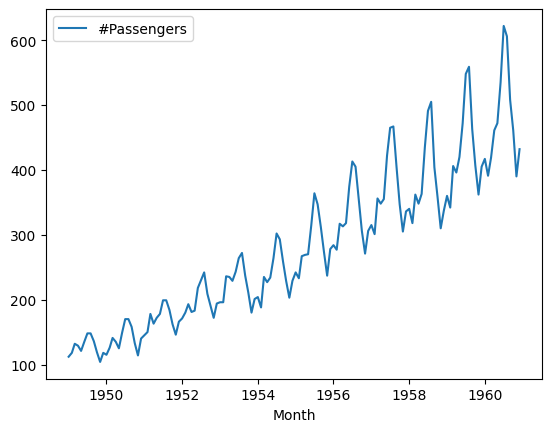

In [49]:
sns.lineplot(df)

In [53]:
rolling_mean = df.rolling(7).mean()
rolling_std = df.rolling(7).std()

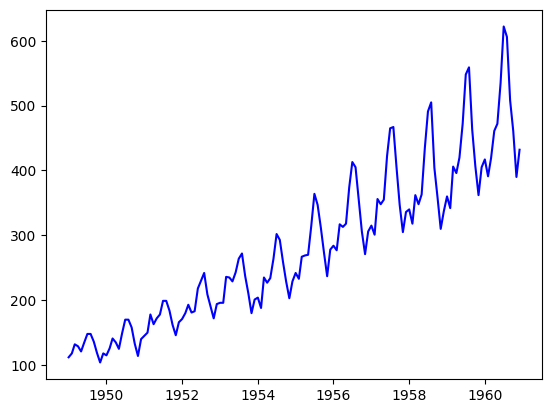

In [54]:
plt.plot(df, color='blue',label='Original Passenger Data')

скользящее среднее отклонение

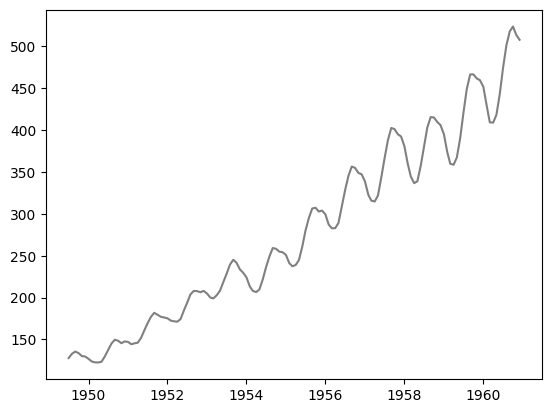

In [55]:
plt.plot(rolling_mean, color='grey', label='Rolling Mean Passenger Number')

скользящее стандартное отклонение

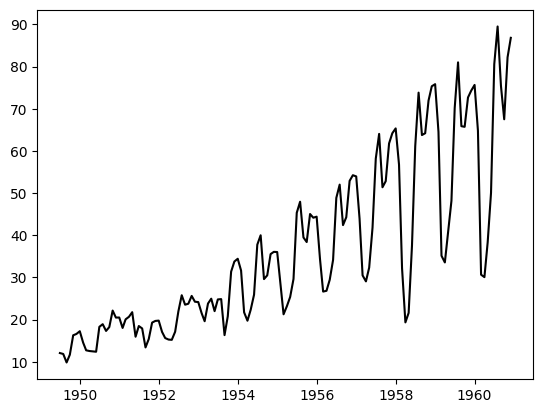

In [56]:
plt.plot(rolling_std, color='black', label = 'Rolling Standard Deviation in Passenger Number')

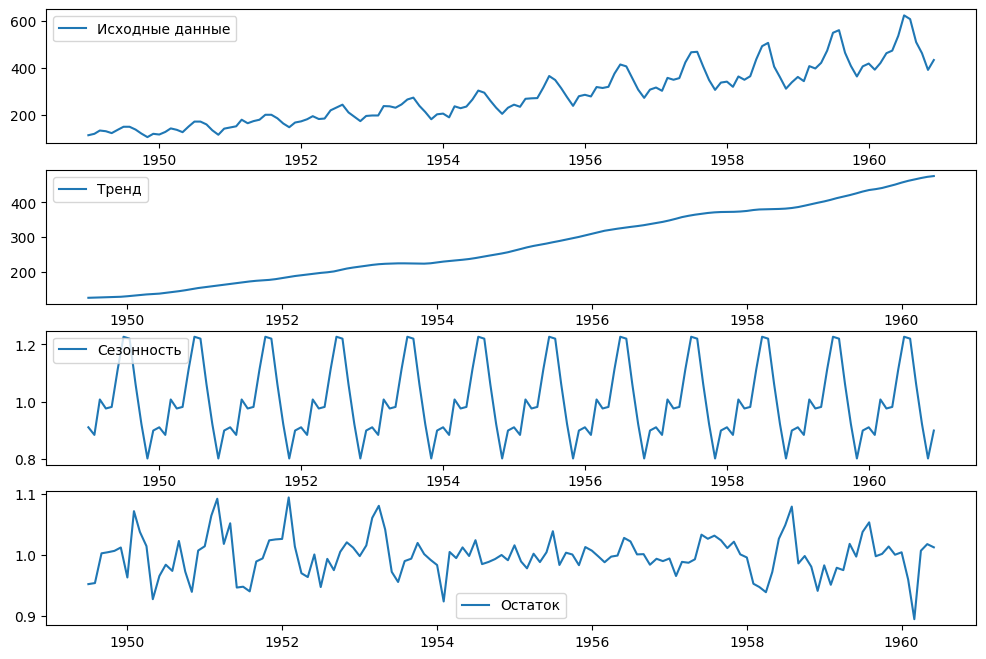

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# загрузка данных
data = pd.read_csv('AirPassengers.csv', index_col='Month', parse_dates=True)

# декомпозиция временного ряда
result = seasonal_decompose(data, model='multiplicative')

# вывод результатов
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(data, label='Исходные данные')
plt.legend()
plt.subplot(412)
plt.plot(result.trend, label='Тренд')
plt.legend()
plt.subplot(413)
plt.plot(result.seasonal,label='Сезонность')
plt.legend()
plt.subplot(414)
plt.plot(result.resid, label='Остаток')
plt.legend()
plt.show()

- Тренд показывает увеличение числа пассажиров со временем.
- Сезонность показывает повторяющиеся циклы увеличения и уменьшения числа пассажиров в течение года.
- Остаток показывает случайную составляющую временного ряда.

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA

# загрузка данных
data = pd.read_csv('AirPassengers.csv', index_col='Month', parse_dates=True)



In [70]:
# разделение данных на обучающую и тестовую выборки
train_data = data.iloc[:-12]
test_data = data.iloc[-12:]



In [73]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters.model import ExponentialSmoothing




In [74]:
# обучение модели ARIMA
arima_model = ARIMA(data, order=(1, 1, 1))
arima_result = arima_model.fit()



/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [75]:
# обучение модели Holt-Winters
hw_model = ExponentialSmoothing(data)
hw_result = hw_model.fit()



/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


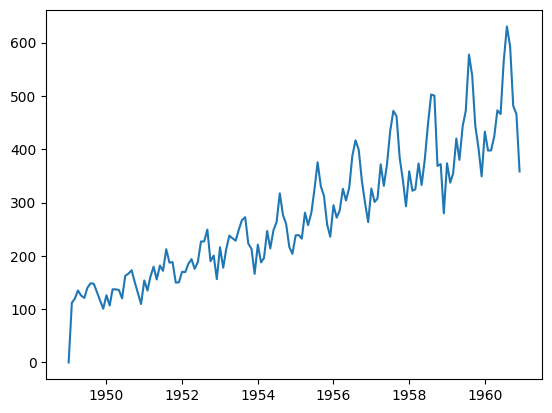

In [84]:
plt.plot(arima_result.fittedvalues, label='ARIMA')

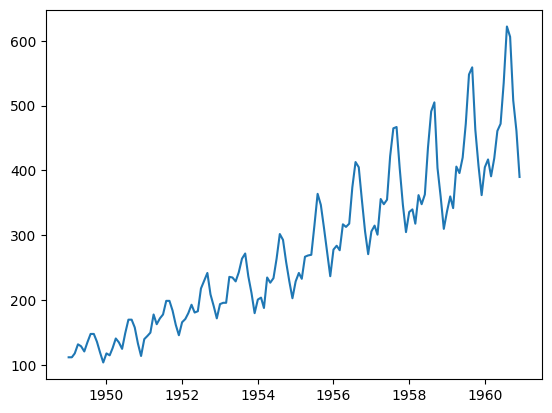

In [85]:
plt.plot(hw_result.fittedvalues, label='Holt-Winters')

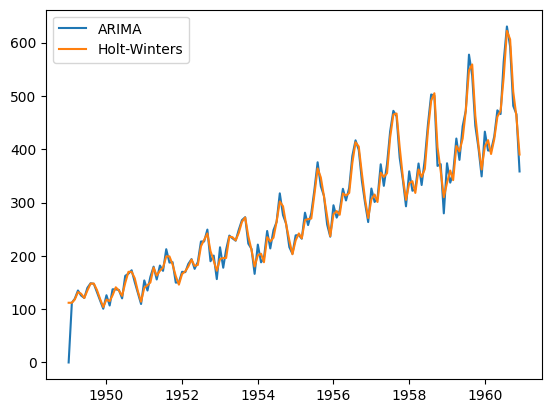

In [86]:
# создание графика сравнения моделей
plt.plot(arima_result.fittedvalues, label='ARIMA')
plt.plot(hw_result.fittedvalues, label='Holt-Winters')
plt.legend()
plt.show()



Отчет за год

<ipython-input-83-04387ce00f85>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['1950']['#Passengers'].plot(figsize=(10, 6))


<Axes: xlabel='Month'>

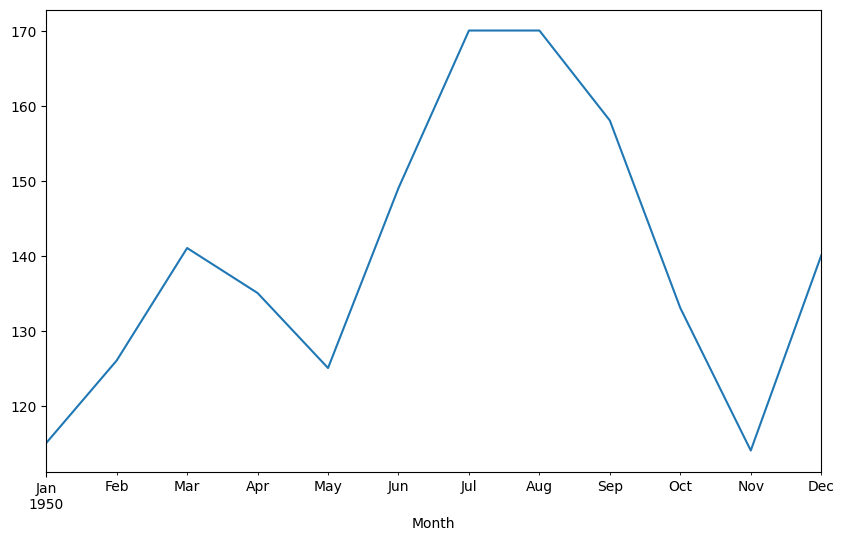

In [83]:
df['1950']['#Passengers'].plot(figsize=(10, 6))